In [1]:
from skimage.io import imread
from skimage import img_as_float
from matplotlib import pyplot as plt
from instaFilters import * # Import Chunlok's Filters

import invert

In [2]:
f = reyes
f_name = "reyes"

In [3]:
X, y = invert.dataset("%s.npz" % f_name, f, 1000000)

Generating dataset:
1% done
2% done
3% done
4% done
5% done
6% done
7% done
8% done
9% done
10% done
11% done
12% done
13% done
14% done
15% done
16% done
17% done
18% done
19% done
20% done
21% done
22% done
23% done
24% done
25% done
26% done
27% done
28% done
29% done
30% done
31% done
32% done
33% done
34% done
35% done
36% done
37% done
38% done
39% done
40% done
41% done
42% done
43% done
44% done
45% done
46% done
47% done
48% done
49% done
50% done
51% done
52% done
53% done
54% done
55% done
56% done
57% done
58% done
59% done
60% done
61% done
62% done
63% done
64% done
65% done
66% done
67% done
68% done
69% done
70% done
71% done
72% done
73% done
74% done
75% done
76% done
77% done
78% done
79% done
80% done
81% done
82% done
83% done
84% done
85% done
86% done
87% done
88% done
89% done
90% done
91% done
92% done
93% done
94% done
95% done
96% done
97% done
98% done
99% done
100% done
Dataset generation complete.


In [4]:
model = invert.create_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 27)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1792      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 10,307
Trainable params: 10,307
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Now actually train the model
history = invert.train_model(model, X, y)

...

In [6]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()

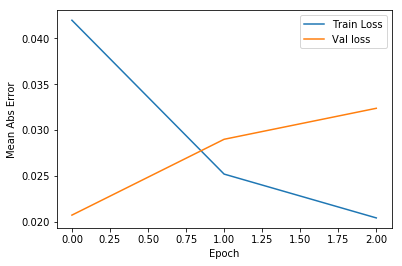

In [7]:
plot_history(history)

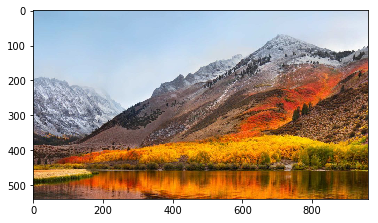

In [8]:
# Okay, so our model is trained. Now we test on an existing image.
# First we load and show the original image:
# Load the unfiltered image
im = img_as_float(imread("photo.jpg"))
plt.imshow(im)
plt.show()

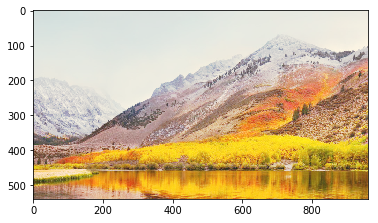

In [9]:
# Then we apply the filter on the image
filtIm = f(im)
plt.imshow(filtIm)
plt.show()

In [11]:
# Now we try the inverter
outIm = invert.unfilter_image(filtIm, model)

/Users/cgokmen/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [ ]:
# Finally we display the now-unfiltered image
plt.imshow(outIm)
plt.show()

In [ ]:
# This is what the original looked like: similar?
plt.imshow(im)
plt.show()

In [ ]:
# Great! Save the model.
invert.save_model('%s.h5' % f_name, model)